# Fixing Annotations

WNixalo - 4/5/2018

---

## Setup

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai.conv_learner import *
sys.path.insert(1, os.path.join('../'))
from utils import common
from utils import temp_utils
from utils.subfolder_val_idxs import set_val_idxs
from matplotlib import patches, patheffects

PATH = Path('../data')
PATH_TRAIN     = PATH/'train'
PATH_TRAIN_BBX = PATH/'interstage_train'
PATH_CSV     = PATH/'labels.csv'
PATH_CSV_BBX = PATH/'interstage_labels.csv'
CPU_PATH_CSV     = PATH/'cpu_labels.csv'
CPU_PATH_CSV_BBX = PATH/'cpu_interstage_labels.csv'

In [573]:
def bb_hw(bbx):
    h = bbx[3] - bbx[1]
    w = bbx[2] - bbx[0]
    return h,w

def show_img(img, bbx, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    ax.get_xaxis().set_visible(False); ax.get_yaxis().set_visible(False)
    return ax

def draw_outline(o, λw):
    o.set_path_effects([patheffects.Stroke(linewidth=λw, foreground='black'), patheffects.Normal()])

def draw_rect(ax, bbx):
    h,w = bb_hw(bbx)
    # draw bounding box
    patch = ax.add_patch(patches.Rectangle(bbx[:2], w,h, fill=False, edgecolor='white', lw=2))
    # outline it
    draw_outline(patch, 4)

def draw_text(ax, xy, txt, sz=14):
    # draw classification
    text = ax.text(*xy, 'Pilot', verticalalignment='top', color='white', fontsize=sz, weight='bold')
    # outline it
    draw_outline(text, 1)
    
def display_anno(img, bbx, clsfn=None):
    ax = show_img(img, bbx)
    draw_rect(ax, bbx)
    draw_text(ax, bbx[:2], clsfn)

In [42]:
df_bbx = pd.read_csv(PATH_CSV_BBX)
df     = pd.read_csv(PATH_CSV)

In [43]:
df_bbx.head()

,id,x1,y1,x2,y2,class
0,interstage_train/000000-000412/000000.jpg,83,72,191,380,pilot
1,interstage_train/000000-000412/000001.jpg,52,89,204,381,pilot
2,interstage_train/000000-000412/000002.jpg,58,89,208,390,pilot
3,interstage_train/000000-000412/000003.jpg,66,98,214,388,pilot
4,interstage_train/000000-000412/000004.jpg,65,90,209,389,pilot


In [44]:
df.head()

,id,gloc
0,000000-000412/000000,0
1,000000-000412/000001,0
2,000000-000412/000002,0
3,000000-000412/000003,0
4,000000-000412/000004,0


In [33]:
df_bbx.index

RangeIndex(start=0, stop=7637, step=1)

In [39]:
i = 0; n = len(df_bbx.index)

006440-006548/006500.jpg
[5,13,238,387]


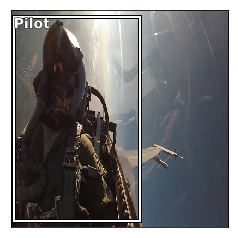

In [574]:
idx = 6500
bbx = df_bbx.iloc[idx].values[1:5]
f_img = df_bbx.iloc[idx].values[0].split('interstage_train/')[-1]
img = Image.open(PATH_TRAIN/f_img)
display_anno(img, bbx)
print(f_img)
print(f'[{bbx[0]},{bbx[1]},{bbx[2]},{bbx[3]}]')

Alright so that's how it's going to work. Time to get to it. Starting time: 17:45, 4/5/2018.

In [101]:
def get_image_bbx(idx, df):
    bbx = df.iloc[idx].values[1:5]
    f_img = df.iloc[idx].values[0].split('interstage_train/')[-1]
    img = Image.open(PATH_TRAIN/f_img)
    return img, bbx, f_img

def display_check_anno(img, bbx, f_img):
    display_anno(img, bbx)
    print(f_img)
    print(f'{bbx[0]} {bbx[1]} {bbx[2]} {bbx[3]}')
        
# def update_anno(idx):
# #     TODO

In [100]:
img, bbx, f_img = get_image_bbx(idx, df_bbx)

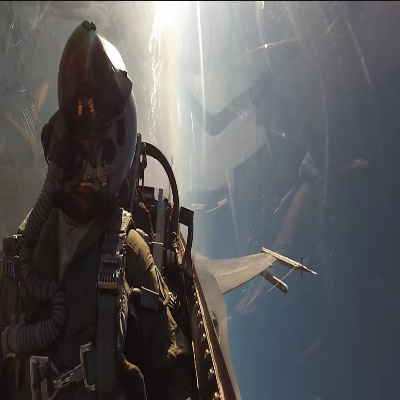

In [70]:
img

In [71]:
bbx

array([5, 13, 238, 387], dtype=object)

## Fixing

In [102]:
new_bbxs = []

In [103]:
df_bbx.iloc[0]

id       interstage_train/000000-000412/000000.jpg
x1                                              83
y1                                              72
x2                                             191
y2                                             380
class                                        pilot
Name: 0, dtype: object

In [535]:
idx -=1
print(idx)

160


In [575]:
idx = -1

63
000000-000412/000063.jpg
50 80 212 386


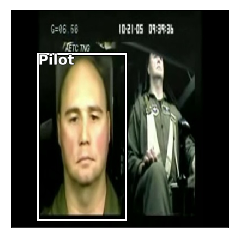

In [639]:
idx += 1
print(idx)

img,bbx,f_img = get_image_bbx(idx, df_bbx)
display_check_anno(img, bbx, f_img)

000000-000412/000163.jpg
56 89 212 379


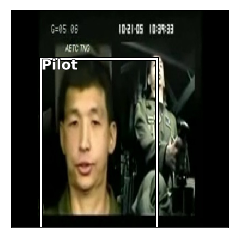

In [571]:
bbx[0] += 0
bbx[1] += 0
bbx[2] += -20
bbx[3] += 0

display_check_anno(img, bbx, f_img)

In [559]:
new_bbxs.append([idx, bbx])

In [320]:
new_bbxs

[[0, array([73, 92, 131, 290], dtype=object)],
 [26, array([49, 68, 181, 319], dtype=object)],
 [29, array([58, 95, 163, 287], dtype=object)],
 [33, array([65, 98, 141, 276], dtype=object)],
 [44, array([48, 79, 171, 294], dtype=object)],
 [61, array([59, 80, 156, 299], dtype=object)]]